In [283]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install ydata_profiling

In [855]:
df=pd.read_csv('train.csv')
df.head()
test= pd.read_csv('test.csv')
test_ids= test['id']

In [856]:
# from ydata_profiling import ProfileReport
# Report= ProfileReport(df)
# Report.to_file(output_file='Report.html')

In [859]:
df['Academic/Work Pressure'] = df['Academic Pressure'].fillna(df['Work Pressure'])
df.drop(['Academic Pressure', 'Work Pressure'], axis=1, inplace=True)

#for test data
test['Academic/Work Pressure'] = test['Academic Pressure'].fillna(test['Work Pressure'])
test.drop(['Academic Pressure', 'Work Pressure'], axis=1, inplace=True)

In [861]:
df['Job/Study Satisfaction'] = df['Study Satisfaction'].fillna(df['Job Satisfaction'])
df.drop(['Study Satisfaction', 'Job Satisfaction'], axis=1, inplace=True)

#for test data
test['Job/Study Satisfaction'] = test['Study Satisfaction'].fillna(test['Job Satisfaction'])
test.drop(['Study Satisfaction', 'Job Satisfaction'], axis=1, inplace=True)

In [863]:
df['Profession/Student'] = df['Working Professional or Student'].where(df['Working Professional or Student'] != 'Working Professional', df['Profession'])
df.drop(['Working Professional or Student', 'Profession'], axis=1, inplace=True)

#for test data
test['Profession/Student'] = test['Working Professional or Student'].where(test['Working Professional or Student'] != 'Working Professional', test['Profession'])
test.drop(['Working Professional or Student', 'Profession'], axis=1, inplace=True)

In [865]:
df.drop(['CGPA','Name','City'], axis=1, inplace=True)
#for test data
test.drop(['CGPA','Name','City'], axis=1, inplace=True)

In [867]:
# %matplotlib inline
# plt.figure(figsize=(10,10))
# sns.boxplot(x='Job Satisfaction',y='Academic Pressure',data=df)
# plt.show()

In [869]:
def impute_Profession_Student(cols):
    Profession_Student = cols[0]
    Degree = cols[1]
    if pd.isnull(Profession_Student):
        if Degree == 'Class 12':
            return 'unemployed'
    else:
        return Profession_Student



In [871]:
df['Profession/Student']= df[['Profession/Student','Degree']].apply(impute_Profession_Student,axis=1)
df['Profession/Student'].tail(10)

#for test data
test['Profession/Student']= test[['Profession/Student','Degree']].apply(impute_Profession_Student,axis=1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_14444\2549491652.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Profession_Student = cols[0]
C:\Users\Asus\AppData\Local\Temp\ipykernel_14444\2549491652.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Degree = cols[1]
C:\Users\Asus\AppData\Local\Temp\ipykernel_14444\2549491652.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Profession_Student = cols[0]
C:\Users\Asus\AppData\Loc

In [873]:
# df = df[~df['Sleep Duration'].isin(['Unhealthy','Work_Study_Hours','No','Indore','Moderate','Sleep_Duration','Pune'])]
#test = test[~test['Sleep Duration'].isin(['Unhealthy','Work_Study_Hours','No','Indore','Moderate','Sleep_Duration','Pune'])]

In [875]:
def categorize_sleep(value):
    # Handle specific categories directly
    if 'More than 8 hours' in value or '8 hours' in value or '9-11 hours' in value or '10-11 hours' in value:
        return 'Over Sleep'
    if 'Less than 5 hours' in value or 'than 5 hours' in value or '1-2 hours' in value or '2-3 hours' in value:
        return 'Very Little Sleep'
    if '5-6 hours' in value or '4-6 hours' in value or '6-7 hours' in value or '3-4 hours' in value:
        return 'Little Sleep'
    if '6-8 hours' in value or '7-8 hours' in value or '8-9 hours' in value:
        return 'Moderate Sleep'
    
    # Handle unusual or extreme cases (high/low hours)
    if '40-45 hours' in value or '45' in value or '49 hours' in value or '35-36 hours' in value or '55-66 hours' in value:
        return 'Unusual Sleep'

    # Handle other unusual categories
    if value in ['Work_Study_Hours', '9-5', '9-5 hours', 'Indore', 'No', 'Unhealthy']:
        return 'Unusual Sleep'

    # For invalid or unknown categories, mark as 'Unusual Sleep'
    return 'Unusual Sleep'

# Apply the cleaning function to the 'Sleep Duration' column
df['Categorized Sleep Duration'] = df['Sleep Duration'].apply(categorize_sleep)
test['Categorized Sleep Duration'] = test['Sleep Duration'].apply(categorize_sleep)

In [877]:
def categorize_health_status(value):
    if value in ['Healthy', 'More Healthy', 'Yes']:
        return 'Healthy'
    if value in ['Moderate', 'Less than Healthy', 'Less Healthy', 'No Healthy']:
        return 'Moderate'
    if value in ['Unhealthy', 'No', 'Vegas', 'Indoor']:
        return 'Unhealthy'
    
    # Handle NaN or unexpected categories
    return 'Unknown'

# Apply the categorization function to the 'Health Status' column
df['Categorized Health Status'] = df['Dietary Habits'].apply(categorize_health_status)

test['Categorized Health Status'] = test['Dietary Habits'].apply(categorize_health_status)

In [879]:
def categorize_degree(value):
    if isinstance(value, float) and pd.isna(value):  # Check for NaN values
        return 'Unknown'
    
    # Class 12
    if value in ['Class 12', 'Class 11']:
        return 'Class 12'
    
    # B.Ed
    if 'B.Ed' in value:
        return 'B.Ed'
    
    # B.Arch
    if 'B.Arch' in value or 'BArch' in value:
        return 'B.Arch'
    
    # B.Com
    if 'B.Com' in value or 'B B.Com' in value:
        return 'B.Com'
    
    # B.Pharm
    if 'B.Pharm' in value or 'BPharm' in value or 'P.Pharm' in value:
        return 'B.Pharm'
    
    # B.Sc
    if 'B.Sc' in value or 'BSc' in value:
        return 'B.Sc'
    
    # Bachelors in General
    if any(x in value for x in ['BHM', 'BBA', 'BCA', 'BE', 'B.Tech']):
        return 'Bachelors in General'
    
    # Masters
    if any(x in value for x in ['MCA', 'MBA', 'M.Tech', 'MSc', 'PhD', 'MA', 'M.Ed']):
        return 'Masters'
    
    # Miscellaneous (non-education categories)
    return 'Miscellaneous'

# Apply the categorization function to the 'Degree' column
df['Categorized Degree'] = df['Degree'].apply(categorize_degree)

test['Categorized Degree'] = test['Degree'].apply(categorize_degree)

In [881]:
 
known_professions = [
    'Student', 'Teacher', 'unemployed', 'Content Writer', 'Architect', 'Consultant', 
    'HR Manager', 'Pharmacist', 'Doctor', 'Business Analyst', 'Entrepreneur', 'Chemist', 
    'Chef', 'Educational Consultant', 'Data Scientist', 'Researcher', 'Lawyer', 'Customer Support', 
    'Marketing Manager', 'Pilot', 'Travel Consultant', 'Plumber', 'Sales Executive', 'Manager', 
    'Judge', 'Electrician', 'Financial Analyst', 'Software Engineer', 'Civil Engineer', 'UX/UI Designer', 
    'Digital Marketer', 'Accountant', 'Finanancial Analyst', 'Mechanical Engineer', 'Graphic Designer', 
    'Research Analyst', 'Investment Banker'
]
def categorize_profession(value):
    if isinstance(value, float) and pd.isna(value):  # Check for NaN values
        return 'Unknown'
    if value in known_professions:
        return value  
    else:
        return 'Miscellaneous' 


df['Categorized Profession'] = df['Profession/Student'].apply(categorize_profession)

test['Categorized Profession'] = test['Profession/Student'].apply(categorize_profession)

In [883]:
unique_categories = df['Categorized Profession'].unique()
print("Unique categories:", unique_categories)

# Using value_counts()
category_counts = df['Categorized Profession'].value_counts()
print("Category counts:\n", category_counts)
category_info = df['Categorized Profession'].info()
print("Category info:\n", category_info)

Unique categories: ['Chef' 'Teacher' 'Student' 'Business Analyst' 'Finanancial Analyst'
 'Chemist' 'Electrician' 'Software Engineer' 'Data Scientist' 'Plumber'
 'Marketing Manager' 'Accountant' 'Entrepreneur' 'HR Manager'
 'UX/UI Designer' 'Content Writer' 'unemployed' 'Educational Consultant'
 'Civil Engineer' 'Manager' 'Pharmacist' 'Financial Analyst' 'Architect'
 'Mechanical Engineer' 'Customer Support' 'Consultant' 'Judge'
 'Researcher' 'Pilot' 'Graphic Designer' 'Travel Consultant'
 'Digital Marketer' 'Lawyer' 'Research Analyst' 'Sales Executive' 'Doctor'
 'Miscellaneous' 'Investment Banker']
Category counts:
 Categorized Profession
Student                   27905
Teacher                   24900
unemployed                 8590
Content Writer             7812
Architect                  4362
Consultant                 4229
HR Manager                 4022
Pharmacist                 3891
Doctor                     3253
Business Analyst           3161
Entrepreneur               2967
Ch

In [885]:
df.drop(['Sleep Duration'], axis=1, inplace=True)

test.drop(['Sleep Duration'], axis=1, inplace=True)

In [887]:
df.drop(['Dietary Habits'], axis=1, inplace=True)

test.drop(['Dietary Habits'], axis=1, inplace=True)

In [889]:
df.drop(['Degree'], axis=1, inplace=True)

test.drop(['Degree'], axis=1, inplace=True)

In [891]:
df.drop(['Profession/Student'], axis=1, inplace=True)

test.drop(['Profession/Student'], axis=1, inplace=True)

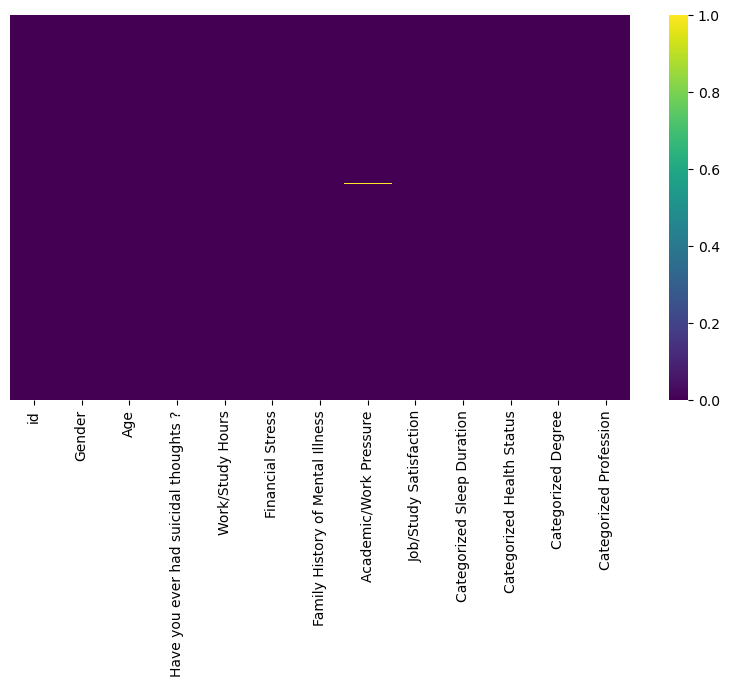

In [893]:
plt.figure(figsize=(10,5))
sns.heatmap(test.isnull(),yticklabels=False,cmap='viridis')
plt.show()

In [895]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import OneHotEncoder,PowerTransformer,MinMaxScaler,OrdinalEncoder
from sklearn.impute import KNNImputer,SimpleImputer,IterativeImputer

In [897]:
numerical_pipeline= make_pipeline(
    SimpleImputer(strategy='mean'),
    MinMaxScaler(),
    PowerTransformer()
)
categorical_pipeline1= make_pipeline(
    OneHotEncoder(sparse_output=False,drop='first'),
    MinMaxScaler(),
    SimpleImputer(strategy='most_frequent')
     
)
categorical_pipeline2= make_pipeline(
    OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1,categories=[['High School','''Bachelor's''','PhD','''Master's'''],['Poor','Average','Good']]),
   # IterativeImputer(max_iter=20, random_state=0)
    MinMaxScaler()
)

In [899]:
numeric_columns = df.select_dtypes(include=['number']).columns
print("Numeric Column Names:", numeric_columns)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Column Names:", categorical_columns)

Numeric Column Names: Index(['id', 'Age', 'Work/Study Hours', 'Financial Stress', 'Depression',
       'Academic/Work Pressure', 'Job/Study Satisfaction'],
      dtype='object')
Categorical Column Names: Index(['Gender', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness', 'Categorized Sleep Duration',
       'Categorized Health Status', 'Categorized Degree',
       'Categorized Profession'],
      dtype='object')


In [901]:
Preprocessor= make_column_transformer( 
    (numerical_pipeline,['id', 'Age', 'Work/Study Hours', 'Financial Stress',
       'Academic/Work Pressure', 'Job/Study Satisfaction']),
    (categorical_pipeline1,['Gender','Categorized Sleep Duration', 'Categorized Health Status', 'Categorized Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness', 'Categorized Profession']),
    
    remainder='passthrough')

In [911]:
x= df.drop(['Depression'],axis=1)
y= df['Depression']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [913]:
x_train_td=Preprocessor.fit_transform(x_train)
x_test_td=Preprocessor.transform(x_test)
test_td=Preprocessor.transform(test)

In [791]:
result = {}
for column in df.columns:
    found = df[column].isin(['M.Pharm', 'Unhealthy', 'Surat', 'B.Pharm', 'Manvi', 'MCA', 'Name', 'City Consultant', 'No', 'Samar', '24th', 'Surgeon', 'ME', 'Simran', 'MD'])
    if found.any():
        result[column] = df.loc[found, column].unique().tolist()

# Print the result
for column, values in result.items():
    print(f"Column '{column}' contains the categories: {values}")

Column 'Have you ever had suicidal thoughts ?' contains the categories: ['No']
Column 'Family History of Mental Illness' contains the categories: ['No']
Column 'Categorized Health Status' contains the categories: ['Unhealthy']
Column 'Categorized Degree' contains the categories: ['B.Pharm']


In [915]:
pd.DataFrame(test_td).isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
57    0
58    0
59    0
60    0
61    0
Length: 62, dtype: int64

In [917]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

pipeline1 = make_pipeline(
    PCA(n_components=25),            
    LogisticRegression()          
)

pipeline1.fit(x_train_td, y_train)

y_pred = pipeline1.predict(x_test_td)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9361


In [639]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
pipeline2 = make_pipeline(
    PCA(n_components=10),                  # Reduce to 2 principal components
    RandomForestClassifier(random_state=42)  # Random Forest classifier
)

pipeline2.fit(x_train_td, y_train)

y_pred = pipeline2.predict(x_test_td)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9324


In [919]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
pipeline3 = make_pipeline(
    PCA(n_components=30),                  
    DecisionTreeClassifier(random_state=42) 
)

pipeline3.fit(x_train_td, y_train)

y_pred = pipeline3.predict(x_test_td)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9009


In [921]:
submission_pred= pipeline1.predict(test_td)
submit= pd.DataFrame({'id':test_ids.values,'Survived':submission_pred,})
submit.to_csv('mysubmission.csv',index=False)